In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from matplotlib.ticker import MultipleLocator
from PIL import Image
import csv
plt.rcParams.update({'font.size':13})

In [14]:
################################### DATA ZFC #######################################

names_zfc = []
AC_list_zfc= []
ACf_list_zfc = []

Im_list_zfc = []
M_list_zfc = []
dM_list_zfc = []
Mf_list_zfc = []

Ts = [330,332,335,337,340,342,345,347,350,352,355,357,360,362,365]

for i in np.arange(0,len(Ts)-1,2):
    #print(Ts[i])
    names_zfc.append('Magnetometry_Data/AC_Test_'+str(Ts[i])+'K.dat')
    names_zfc.append('Magnetometry_Data/AC_Test_'+str(Ts[i+1])+'p5K.dat')

names_zfc.append('Magnetometry_Data/AC_Test_365K.dat')

for i in np.arange(0,len(names_zfc),1):
    AC_data_u = np.loadtxt(names_zfc[i], delimiter=',',skiprows=45, dtype='str' )[:,21]
    Im_data_u = np.loadtxt(names_zfc[i], delimiter=',',skiprows=45, dtype='str' )[:,23]
    AC_fs_u = np.loadtxt(names_zfc[i], delimiter=',',skiprows=45, dtype='str' )[:,3]
    
    M_data_u = np.loadtxt(names_zfc[i], delimiter=',',skiprows=45, dtype='str' )[:,57]
    M_fs_u = np.loadtxt(names_zfc[i], delimiter=',',skiprows=45, dtype='str' )[:,3]
    
    ### Fix the AC data #####################
    AC_fix_u = []
    Im_fix_u = []
    AC_fs_fix_u = []
    for j in np.arange(0,len(AC_data_u)/4-1,1):
        k = int(1+j*4)
        AC_fix_u.append(AC_data_u[k].astype(float)*10000*0.7)
        AC_fix_u.append(AC_data_u[k+1].astype(float)*10000*0.7)
        
        Im_fix_u.append(Im_data_u[k].astype(float)*10000*0.7)
        Im_fix_u.append(Im_data_u[k+1].astype(float)*10000*0.7)
        
        AC_fs_fix_u.append(AC_fs_u[k].astype(float)/10)
        AC_fs_fix_u.append(AC_fs_u[k+1].astype(float)/10)
    
    ### Fix the M data #####################
    M_fix_u = []
    M_fs_fix_u = []
    for j in np.arange(0,len(AC_data_u)/4-1,1):   
        k = int(j*4)
        M_fix_u.append(M_data_u[k].astype(float))
        M_fix_u.append(M_data_u[k+3].astype(float))

        M_fs_fix_u.append(M_fs_u[k].astype(float)/10)
        M_fs_fix_u.append(M_fs_u[k+3].astype(float)/10)
        
        
    AC_list_zfc.append(AC_fix_u)
    Im_list_zfc.append(Im_fix_u) 
    M_list_zfc.append(M_fix_u)
    
    ACf_list_zfc.append(AC_fs_fix_u)
    Mf_list_zfc.append(M_fs_fix_u)
    
    D = []
    for k in np.arange(0,len(M_list_zfc[i])-1,1):
        D.append((M_list_zfc[i][k+1]-M_list_zfc[i][k-1])/(Mf_list_zfc[i][k+1]-Mf_list_zfc[i][k-1]))
    dM_list_zfc.append(D)

Map_zfc = np.zeros(np.shape(AC_list_zfc))
for i in np.arange(0,len(AC_list_zfc),1):
    Map_zfc[i,:]=AC_list_zfc[i]
Map_zfc = np.rot90(Map_zfc)

iMap_zfc = np.zeros(np.shape(Im_list_zfc))
for i in np.arange(0,len(Im_list_zfc),1):
    iMap_zfc[i,:]=Im_list_zfc[i]
iMap_zfc = np.rot90(iMap_zfc)

dMap_zfc = np.zeros(np.shape(dM_list_zfc))
for i in np.arange(0,len(dM_list_zfc),1):
    dMap_zfc[i,:]=dM_list_zfc[i]
dMap_zfc = np.rot90(dMap_zfc)

In [15]:
M_data_u = np.loadtxt('Magnetometry_Data/Tc_up.dat', delimiter=',',skiprows=45, dtype='str' )[:,4]
Ts_u = np.loadtxt('Magnetometry_Data/Tc_up.dat', delimiter=',',skiprows=45, dtype='str' )[:,2]

M = []
Ts = []
for k in np.arange(0,len(M_data_u),1):   
    M.append(M_data_u[k].astype(float))
    Ts.append(Ts_u[k].astype(float))

<IPython.core.display.Javascript object>


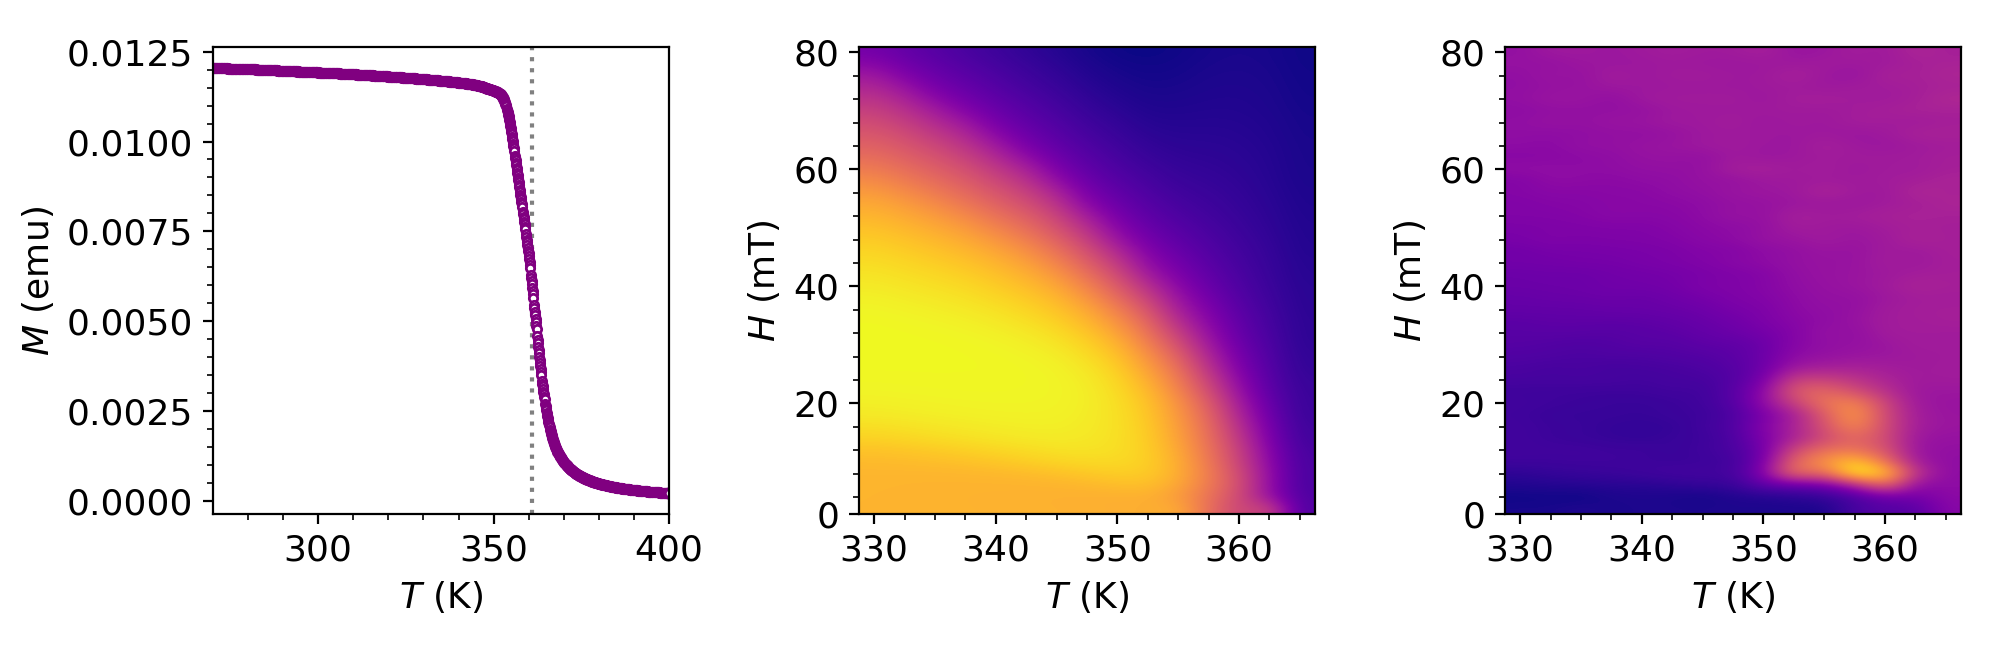

In [17]:
%matplotlib notebook

Temps = [330,340,350,360]
Fields = [0,20,40,60,80]

plt.figure(figsize=(10,3.3))

ax1=plt.subplot2grid((1,3),(0,0), rowspan=1,colspan=1)
plt.axvline(x=361,color='grey',ls=":")
plt.plot(Ts,M,marker='o',color='purple',markersize=3,markerfacecolor='w')
ax1.minorticks_on()
plt.ylabel('$M$ (emu)')
plt.xlabel('$T$ (K)')
plt.xlim([270,400])

ax1=plt.subplot2grid((1,3),(0,1), rowspan=1,colspan=1)
plt.imshow(Map_zfc,aspect='auto',interpolation='bicubic',cmap='plasma')
plt.xticks([0,4,8,12], Temps[::1])
plt.yticks([0,10,20,30,39.5], Fields[::-1])
ax1.minorticks_on()
plt.ylabel('$H$ (mT)')
plt.xlabel('$T$ (K)')


ax1=plt.subplot2grid((1,3),(0,2), rowspan=1,colspan=1)
plt.imshow(iMap_zfc,aspect='auto',interpolation='bicubic',cmap='plasma')
plt.xticks([0,4,8,12], Temps[::1])
plt.yticks([0,10,20,30,39.5], Fields[::-1])
ax1.minorticks_on()
plt.ylabel('$H$ (mT)')
plt.xlabel('$T$ (K)')

plt.tight_layout()

plt.savefig('Figure_Panels/Extended_Data_CoZnMn_Magnetometry.png',dpi=300)